# Spotify Data EDA

In [58]:
# add imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json
import os

# import spotipy
import spotipy

# Data


### Cleanup

#### Collective Playlists Data

In [2]:
# import json file and convert to dataframe
playlist1 = pd.read_json('Spotify Account Data/Playlist1.json')

# split 'playlists' column into multiple columns: name, lastModifiedDate, items, description, numberOfFollowers
playlist1 = pd.concat([playlist1.drop(['playlists'], axis=1), playlist1['playlists'].apply(pd.Series)], axis=1)

# rename columns
playlist1.rename(columns={'name': 'Playlist Name', 'lastModifiedDate': 'Last Modified Date', 'items': 'Playlist Items', 'description': 'Description', 'numberOfFollowers': 'Number of Followers'}, inplace=True)

playlist1.head()


,Playlist Name,Last Modified Date,Playlist Items,Description,Number of Followers
0,karaoke,2024-12-01,[{'track': {'trackName': 'I've Been Everywhere...,None,0
1,dance around it,2024-11-04,"[{'track': {'trackName': 'Dance Around It', 'a...",None,0
2,APT,2024-11-04,"[{'track': {'trackName': 'APT.', 'artistName':...",None,0
3,Zach Bryan Favorites,2024-10-26,"[{'track': {'trackName': 'Quittin' Time', 'art...",Curated with AI.,0
4,bluegrass blues,2024-10-31,[{'track': {'trackName': 'Keep 'Em on They Toe...,None,0


In [3]:
# create a new dataframe for each playlist , with each entry being a track from the 'items' column
# eg from playlist1[0], create a dataframe called karaoke
# column names: trackName, artistName, albumName, trackUri

for i in range(len(playlist1)):
    # create a new dataframe for each playlist
    playlist_name = playlist1['Playlist Name'][i]
    # remove symbolds from playlist name
    playlist_name = playlist_name.replace(' ', '_')
    playlist_name = playlist_name.replace('.', '')
    playlist_name = playlist_name.replace(':', '')
    playlist_name = playlist_name.replace('/', '_')
    playlist_name = playlist_name.replace('\'', '')
    playlist_name = playlist_name.replace('*', '')
    playlist_name = playlist_name.replace('-', '')
    playlist_name = playlist_name.replace('&', 'and')

    # create a new dataframe for each playlist
    playlist = pd.DataFrame()
    # add empty columns to the new dataframe trackName, artistName, albumName, trackUri
    playlist['Track Name'] = np.nan
    playlist['Artist Name'] = np.nan
    playlist['Album Name'] = np.nan
    playlist['Track URI'] = np.nan
    # prep each column for strings
    playlist['Track Name'] = playlist['Track Name'].astype(str)
    playlist['Artist Name'] = playlist['Artist Name'].astype(str)
    playlist['Album Name'] = playlist['Album Name'].astype(str)
    playlist['Track URI'] = playlist['Track URI'].astype(str)

    # add the trackName, artistName, albumName, trackUri to the new dataframe
    # cast data types to string
    for j in range(len(playlist1['Playlist Items'][i])):
        playlist.loc[j, 'Track Name'] = str(playlist1['Playlist Items'][i][j]['track']['trackName'])
        playlist.loc[j, 'Artist Name'] = str(playlist1['Playlist Items'][i][j]['track']['artistName'])
        playlist.loc[j, 'Album Name'] = str(playlist1['Playlist Items'][i][j]['track']['albumName'])
        playlist.loc[j, 'Track URI'] = str(playlist1['Playlist Items'][i][j]['track']['trackUri'])
    
    # save playlist dataframe as playlist_name.csv
    # save to folder 'Playlist Data'  
    
    playlist.to_csv('Spotify Account Data/Playlist Data/' + playlist_name + '.csv', index=False)





In [4]:
# data types
# change Last Modified Date to datetime
playlist1['Last Modified Date'] = pd.to_datetime(playlist1['Last Modified Date'])
print(playlist1.dtypes)

Playlist Name                  object
Last Modified Date     datetime64[ns]
Playlist Items                 object
Description                    object
Number of Followers             int64
dtype: object


#### Individual Playlists Data

In [5]:
acid_waves = pd.read_csv('Spotify Account Data/Playlist Data/acid_waves.csv')
print(acid_waves.dtypes)


Track Name     object
Artist Name    object
Album Name     object
Track URI      object
dtype: object


In [6]:
acid_waves.head()

,Track Name,Artist Name,Album Name,Track URI
0,The Dance,Madaila,The Dance,spotify:track:0LDBn7yVxdyeYeQ7HD5BVU
1,Honey Do,Rococo Disco,Honey Do,spotify:track:6dvm3pErrto8pENw72QIzN
2,Rocky,Still Woozy,Rocky,spotify:track:5uDohC8URXwbGiHAMuKGoa
3,Until We Get There,Lucius,Wildewoman,spotify:track:04hZaH1I3fdJ4s3OJT2ets
4,Bitter Sweet Symphony,The Verve,Urban Hymns,spotify:track:5yEPxDjbbzUzyauGtnmVEC


#### Search Query Data

In [7]:
search_queries = pd.read_json('Spotify Account Data/SearchQueries.json')
# convert json to dataframe columns "platform" "searchTime" "searchQuery" "searchInteractionURIs"

# rename columns
search_queries.rename(columns={'platform': 'Platform', 'searchTime': 'Search Time', 'searchQuery': 'Search Query', 'searchInteractionURIs': 'Search Interaction URIs'}, inplace=True)

search_queries['Search Time'] = search_queries['Search Time'].str.replace('Z[UTC]', '')
search_queries['Search Time'] = search_queries['Search Time'].str.replace('T', ' ')
search_queries['Search Time'] = pd.to_datetime(search_queries['Search Time'])

# make Platform Category type
search_queries['Platform'] = search_queries['Platform'].astype('category')

search_queries.head()

,Platform,Search Time,Search Query,Search Interaction URIs
0,ANDROID,2024-09-16 02:12:34.464,ocea,[spotify:search:ocean+sounds+for+sleep]
1,ANDROID,2024-09-16 02:12:37.821,ocean sounds for sleep,[spotify:episode:37TTpm4WFspptawmMM2myA]
2,ANDROID_ARM,2024-09-18 01:08:23.614,gr,[]
3,ANDROID_ARM,2024-09-18 01:08:24.707,green n,[]
4,ANDROID,2024-09-18 01:08:25.862,green noise,"[spotify:episode:1NhUWKcaBrRHhv24VEi52j, spoti..."


In [8]:
# print data types
print(search_queries.dtypes)


Platform                         category
Search Time                datetime64[ns]
Search Query                       object
Search Interaction URIs            object
dtype: object


#### Streaming Data - Music

In [9]:
streaming_1 = pd.read_json('Spotify Account Data/StreamingHistory_music_1.json')
streaming_0 = pd.read_json('Spotify Account Data/StreamingHistory_music_0.json')

# combine streaming_0 and streaming_1
streaming_history = pd.concat([streaming_0, streaming_1])

# rename and reorder columns
streaming_history.rename(columns={'endTime': 'End Time', 'artistName': 'Artist Name', 'trackName': 'Track Name', 'msPlayed': 'Milliseconds Played'}, inplace=True)
streaming_history = streaming_history[['Track Name', 'Artist Name', 'End Time', 'Milliseconds Played']]

# convert End Time to datetime
streaming_history['End Time'] = pd.to_datetime(streaming_history['End Time'])

streaming_history.head()

,Track Name,Artist Name,End Time,Milliseconds Played
0,VERY ALONE,Zaia,2023-12-12 00:01:00,131147
1,I Am Who Am (Killin' Time) [feat. Niki Randa],Mac Miller,2023-12-12 00:06:00,301097
2,Sagaba,Blue Scholars,2023-12-12 00:10:00,258304
3,Cocoa Butter Kisses,Chance the Rapper,2023-12-12 00:15:00,307188
4,Scalin',Arno Faraji,2023-12-12 00:19:00,211521


In [10]:
streaming_history.dtypes

Track Name                     object
Artist Name                    object
End Time               datetime64[ns]
Milliseconds Played             int64
dtype: object

#### Streaming History - Podcasts

In [11]:
streaming_podcasts = pd.read_json('Spotify Account Data/StreamingHistory_podcast_0.json')

streaming_podcasts.rename(columns={'endTime': 'End Time', 'podcastName': 'Podcast Name', 'episodeName': 'Episode Name', 'msPlayed': 'Milliseconds Played'}, inplace=True)
streaming_podcasts = streaming_podcasts[['Podcast Name', 'Episode Name', 'End Time', 'Milliseconds Played']]

streaming_podcasts['End Time'] = pd.to_datetime(streaming_podcasts['End Time'])
streaming_podcasts.head()

,Podcast Name,Episode Name,End Time,Milliseconds Played
0,founder,on your feet,2024-01-07 13:14:00,3528
1,founder,i'll end it here and now,2024-01-07 13:15:00,1170
2,founder,hear me subjects of ymir,2024-01-07 13:16:00,1087
3,2F Mixes,Vol. 11,2024-05-04 23:29:00,632606
4,F.D Signifier,The Complex History of Mike Tyson,2024-07-29 15:04:00,214


In [12]:
streaming_podcasts.dtypes

Podcast Name                   object
Episode Name                   object
End Time               datetime64[ns]
Milliseconds Played             int64
dtype: object

#### Library Data

In [13]:
# Load JSON data
with open('Spotify Account Data/YourLibrary.json', 'r') as file:
	library_data = json.load(file)

# Normalize JSON data to ensure consistent structure
library = pd.json_normalize(library_data)

# create dataframe from 'tracks' column
track_list = library.tracks[0]

# create track_library dataframe
track_library = pd.DataFrame(track_list)
# rename columns
track_library.rename(columns={'track': 'Track Name', 'artist': 'Artist Name', 'album': 'Album Name', 'uri': 'Track URI'}, inplace=True)
track_library = track_library[['Track Name', 'Artist Name', 'Album Name', 'Track URI']]

track_library.head()

,Track Name,Artist Name,Album Name,Track URI
0,One Headlight,The Wallflowers,Bringing Down The Horse,spotify:track:0z1b34WikhOH9ZxU8QDWcv
1,The General,DISPATCH,Bang Bang,spotify:track:6n6EXIwLtNwe4u4CFzENYm
2,Garden Grove,Sublime,Sublime,spotify:track:5tFpkuwgFZQm3jv4PTX4VB
3,Shake the Frost (Live),Tyler Childers,Live on Red Barn Radio I & II,spotify:track:19MkwMrRjO7773zpuGss1o
4,The Night We Met,Lord Huron,Strange Trails,spotify:track:3hRV0jL3vUpRrcy398teAU



### Playlist1: Playlist Data



| Column Name | Data Type | Description |
| ----------- | --------- | ----------- |
| Playlist Name | String | Given title of the playlist. |
| Last Modified Date | Datetime | Date of last edit (add/remove/rename/etc). |
| Playlist Items | List of Strings | Internal list of all songs (See Playlists) |
| Description | String | Playlist description written by user. |
| Number of Followers | Integer | Number of other users following this playlist. |

### Playlist Data



Folder containing data for each playlist. Contains monthly top 50 playlists (user-created), as well as all other curated playlist.
Each data frame contains the following:

| Column Name | Data Type | Description |
| ----------- | --------- | ----------- |
| Track Name | String | Song title. |
| Artist Name | String | Name of artist. |
| Album Name | String | Name of album which song appears on. |
| Track URI | String | Spotify uniform resource identifier. |

### Inference Data



**From Spotify**: We draw certain inferences about your interests and preferences based on your usage of the Spotify service and using data obtained from our advertisers and other advertising partners. This includes a list of market segments with which you are currently associated. Depending on your settings, this data may be used to serve interest-based advertising to you within the Spotify service.

### Search Query Data



Collection of all user search queries and resulting targets.

| Column Name | Data Type | Description |
| - | - | - |
| Platform | Category | Where query was made: Android device, Windows machine, or _android arm_?|
| Search Time | Datetime | Time in which user made query. |
| Search Query | String | What the user typed in the search bar. |
| Search Interactions URIs | List | Contains a list of strings of user selections as a result of query. |

### Music Streaming History Data



| Column Name | Data Type | Description |
| - | - | - |
| Track Name | String | Song track name. |
| Artist Name | String | Name of song artist. |
| End Time | Datetime | Time listening to song ended. |
| Milliseconds Played | Integer | Total milliseconds listened to. |

### Podcast Streaming History Data


| Column Name | Data Type | Description |
| - | - | - |
| Podcast Name | String | Name of Podcast Series. |
| Episode Name | String | Name of episode. |
| End Time | Datetime | Time listening to podcast ended. |
| Milliseconds Played | Integer | Total milliseconds listened to. |

### My Library

A collection of _all_ songs in my library.

| Column Name | Data Type | Description |
| ----------- | --------- | ----------- |
| Track Name | String | Song title. |
| Artist Name | String | Name of artist. |
| Album Name | String | Name of album which song appears on. |
| Track URI | String | Spotify uniform resource identifier. |

# EDA

In [14]:
# join playlists in Playlist Data folder into one dataframe

# get list of files in Playlist Data folder
files = os.listdir('Spotify Account Data/Playlist Data')

# create copy of track_library dataframe
all_playlist_data = track_library.copy()

# loop through files in Playlist Data folder
for file in files:
    playlist = pd.read_csv('Spotify Account Data/Playlist Data/' + file)
    playlist_name = file.replace('.csv', '')
    playlist[playlist_name] = 1
    # join playlist to all_playlist_data with a full join
    all_playlist_data = all_playlist_data.merge(playlist, how='outer', on=['Track Name', 'Artist Name', 'Album Name', 'Track URI'])

    


all_playlist_data.head()



,Track Name,Artist Name,Album Name,Track URI,22_04,22_05,22_06,22_07,22_08,22_09,...,take_me_to_church,the_void,time_seven_four_rock,time_six_eight_swing,time_twelve_eight_shuffle,trapezoid,twilight,universal_sound,voices_in_my_head,Zach_Bryan_Favorites
0,"""Slut!"" (Taylor's Version) (From The Vault)",Taylor Swift,1989 (Taylor's Version),spotify:track:0CD7DzeCsuPJygddqlUVYa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#88,Lo-Fang,Blue Film,spotify:track:5WmkSIdHkVm8D2J76A7aCW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,&Run,Sir Sly,"Don't You Worry, Honey",spotify:track:0w4m3Xp4svlIoyL94Zjlyd,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'01: Have You Seen It in the Snow?,The Magnetic Fields,50 Song Memoir,spotify:track:6mcLvtWDfPyQDltPAj2Z7Q,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'Round Midnight,Adam Blackstone,'Round Midnight,spotify:track:6rlqNxNTuK3elWsYjc4psh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# write all_playlist_data to csv

all_playlist_data.to_csv('Spotify Account Data/All_Playlist_Data.csv', index=False)

In [16]:
# look at Playlist Data / time_seven_four_rock.csv
time_seven_four_rock = pd.read_csv('Spotify Account Data/Playlist Data/time_seven_four_rock.csv')

# count the number of tracks in the playlist
num_tracks = time_seven_four_rock.shape[0]
print('Number of tracks in time_seven_four_rock:', num_tracks)

Number of tracks in time_seven_four_rock: 26


In [17]:
# count number of tracks in all_playlist_data column time_seven_four_rock
num_tracks_all = all_playlist_data['time_seven_four_rock'].sum()
print('Number of tracks in all_playlist_data column time_seven_four_rock:', num_tracks_all)

Number of tracks in all_playlist_data column time_seven_four_rock: 26.0


In [18]:
# summary statistics
all_playlist_data.describe()


,22_04,22_05,22_06,22_07,22_08,22_09,22_10,22_11,22_12,23_01,...,take_me_to_church,the_void,time_seven_four_rock,time_six_eight_swing,time_twelve_eight_shuffle,trapezoid,twilight,universal_sound,voices_in_my_head,Zach_Bryan_Favorites
count,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,49.0,...,73.0,122.0,26.0,133.0,82.0,130.0,106.0,81.0,63.0,15.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


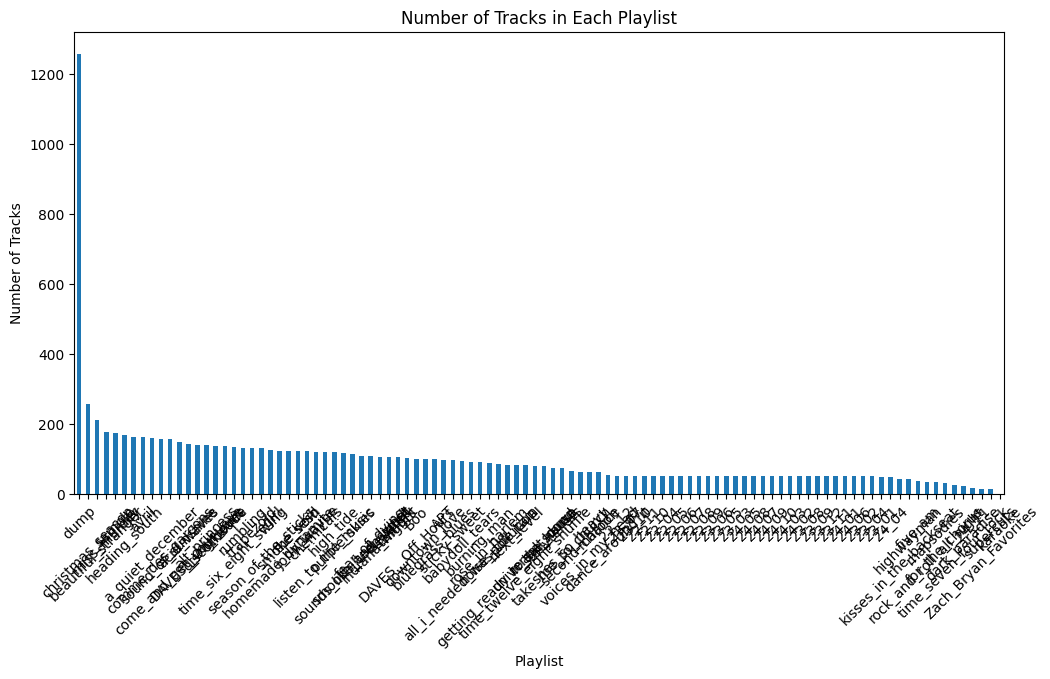

In [19]:
# analyzing all_playlist_data
# number of tracks in each playlist
playlist_counts = all_playlist_data.iloc[:, 4:].sum()
playlist_counts = playlist_counts.sort_values(ascending=False)

# plot number of tracks in each playlist
plt.figure(figsize=(12, 6))
playlist_counts.plot(kind='bar')
plt.title('Number of Tracks in Each Playlist')
plt.ylabel('Number of Tracks')
plt.xlabel('Playlist')
plt.xticks(rotation=45)
plt.show()




In [20]:
# display playlist counts in a table
playlist_counts = playlist_counts.reset_index()
playlist_counts.columns = ['Playlist', 'Number of Tracks']
playlist_counts


,Playlist,Number of Tracks
0,dump,1258.0
1,christmas_season,258.0
2,beautiful_stranger,212.0
3,miss_murder,178.0
4,sample,173.0
...,...,...
97,dark_paradise,23.0
98,24_11,18.0
99,Zach_Bryan_Favorites,15.0
100,supercuts,14.0


In [21]:
# display top 10 playlists (by number of tracks)
top_10_playlists = playlist_counts.head(10)
top_10_playlists

,Playlist,Number of Tracks
0,dump,1258.0
1,christmas_season,258.0
2,beautiful_stranger,212.0
3,miss_murder,178.0
4,sample,173.0
5,heading_south,169.0
6,ily,164.0
7,avril,162.0
8,a_quiet_december,161.0
9,comme_des_garçons,158.0


In [22]:
# display bottom 10 playlists (by number of tracks)
bottom_10_playlists = playlist_counts.tail(10)
bottom_10_playlists

,Playlist,Number of Tracks
92,five_am,38.0
93,rock_and_roll_all_night,33.0
94,rhapsodies,33.0
95,for_the_chorus,31.0
96,time_seven_four_rock,26.0
97,dark_paradise,23.0
98,24_11,18.0
99,Zach_Bryan_Favorites,15.0
100,supercuts,14.0
101,karaoke,1.0


In [23]:
# display most placed songs in playlists (top 10) displaying track name and number of playlists

# sum the number of playlists each track is in (row sums)
all_playlist_data['Number of Playlists'] = all_playlist_data.iloc[:, 4:].sum(axis=1)

# sort by number of playlists
most_placed_songs = all_playlist_data.sort_values(by='Number of Playlists', ascending=False)

# display top 10 most played songs
top_10_most_placed_songs = most_placed_songs[['Track Name', 'Number of Playlists']].head(10)
top_10_most_placed_songs

,Track Name,Number of Playlists
1261,Diamond Studded Shoes,10.0
1401,Drift Away,9.0
3959,Running Out Of Time,9.0
4291,Soak Up The Sun,9.0
3524,One Headlight,8.0
178,Ain't No Man,8.0
206,All I Needed Was the Rain,8.0
4193,Sing To Me,8.0
1045,Comme Des Garçons (Like The Boys),8.0
538,Better Days (feat. John Mayer),8.0


In [24]:
# list all the playlists that the song "Diamond Studded Shoes" is in
diamond_studded_shoes = all_playlist_data[all_playlist_data['Track Name'] == 'Diamond Studded Shoes']
diamond_studded_shoes = diamond_studded_shoes.iloc[:, 4:].sum()
diamond_studded_shoes = diamond_studded_shoes[diamond_studded_shoes > 0]
diamond_studded_shoes = diamond_studded_shoes.reset_index()
diamond_studded_shoes.columns = ['Playlist', 'In Playlist']
print(diamond_studded_shoes.Playlist)

0                         23_08
1               DAVES__On_Hours
2                          dump
3     getting_ready_to_get_down
4                     high_tide
5                indiana_nights
6                    john_wayne
7           listen_to_the_music
8          season_of_the_sticks
9             sound_of_sunshine
10          Number of Playlists
Name: Playlist, dtype: object


In [25]:
# look at music streaming history data
streaming_history.head()


,Track Name,Artist Name,End Time,Milliseconds Played
0,VERY ALONE,Zaia,2023-12-12 00:01:00,131147
1,I Am Who Am (Killin' Time) [feat. Niki Randa],Mac Miller,2023-12-12 00:06:00,301097
2,Sagaba,Blue Scholars,2023-12-12 00:10:00,258304
3,Cocoa Butter Kisses,Chance the Rapper,2023-12-12 00:15:00,307188
4,Scalin',Arno Faraji,2023-12-12 00:19:00,211521


In [27]:
# convert Milliseconds Played to minutes
streaming_history['Minutes Played'] = streaming_history['Milliseconds Played'] / 60000
streaming_history['Minutes Played'] = streaming_history['Minutes Played'].round(2)
# drop Milliseconds Played column
streaming_history = streaming_history.drop('Milliseconds Played', axis=1)
# convert minutes played to numeric
streaming_history['Minutes Played'] = pd.to_numeric(streaming_history['Minutes Played'])
streaming_history.head()

,Track Name,Artist Name,End Time,Minutes Played
0,VERY ALONE,Zaia,2023-12-12 00:01:00,2.19
1,I Am Who Am (Killin' Time) [feat. Niki Randa],Mac Miller,2023-12-12 00:06:00,5.02
2,Sagaba,Blue Scholars,2023-12-12 00:10:00,4.31
3,Cocoa Butter Kisses,Chance the Rapper,2023-12-12 00:15:00,5.12
4,Scalin',Arno Faraji,2023-12-12 00:19:00,3.53


In [28]:
# number of unique tracks in streaming history
unique_tracks = streaming_history['Track Name'].nunique()
print('Number of unique tracks in streaming history:', unique_tracks)


Number of unique tracks in streaming history: 5344


In [29]:
# number of unique tracks in all_playlist_data
unique_tracks_all = all_playlist_data['Track Name'].nunique()
print('Number of unique tracks in all_playlist_data:', unique_tracks_all)

Number of unique tracks in all_playlist_data: 5285


In [ ]:
# Look at streaming history; combine rows with same tracks and sum minutes played
streaming_history = streaming_history.groupby(['Track Name', 'Artist Name']).agg({'Minutes Played': 'sum'}).reset_index()

# sort by Minutes Played
streaming_history = streaming_history.sort_values(by='Minutes Played', ascending=False)
streaming_history.head()

,Track Name,Artist Name,Minutes Played
4561,The Killing Kind,Marianas Trench,289.93
551,Better Days (feat. John Mayer),Zach Bryan,193.49
4862,Universal Sound,Tyler Childers,187.46
2273,I Was Just a Kid,Nothing But Thieves,179.36
870,Charleston Girl (Live),Tyler Childers,173.12


In [32]:
# what songs are in streaming history but not in all_playlist_data
# left join exluding songs in all_playlist_data
missing_songs = streaming_history.merge(all_playlist_data, on=['Track Name', 'Artist Name'], how='left', indicator=True)
missing_songs = missing_songs[missing_songs['_merge'] == 'left_only']
missing_songs = missing_songs[['Track Name', 'Artist Name', 'Minutes Played']]
missing_songs = missing_songs.drop_duplicates()
missing_songs = missing_songs.reset_index(drop=True)
missing_songs

# hot damn this is right; I've been listening to a lot of music that I haven't added to my playlists!! 
# I listened to 2081 songs in the last year that I didn't add to my playlists dun dun dunnn
# looking at the minutes played though, it's only 1.5% of my total minutes played
# also Real Groove isn't in any playlists, ts like my #1 dance song

,Track Name,Artist Name,Minutes Played
0,Meet Me in the Woods,Lord Huron,44.27
1,Under the Tree,SiM,19.23
2,a boy named pluto (acoustic),Hailey Knox,19.05
3,Build Me Up Buttercup - Mono,The Foundations,16.74
4,Real Groove (Studio 2054 Remix),Kylie Minogue,15.32
...,...,...,...
2076,A Fork In The Road,Smokey Robinson & The Miracles,0.01
2077,You Here Tonight,Josh Meloy,0.00
2078,Crash into Me,Dave Matthews Band,0.00
2079,By the Light of the Moon,Dave Simonett,0.00


In [34]:
# show the top 10 songs in streaming history that are not in all_playlist_data
top_20_missing_songs = missing_songs.head(20)
top_20_missing_songs

,Track Name,Artist Name,Minutes Played
0,Meet Me in the Woods,Lord Huron,44.27
1,Under the Tree,SiM,19.23
2,a boy named pluto (acoustic),Hailey Knox,19.05
3,Build Me Up Buttercup - Mono,The Foundations,16.74
4,Real Groove (Studio 2054 Remix),Kylie Minogue,15.32
5,Silver Springs - 2004 Remaster,Fleetwood Mac,14.52
6,Bass Boat,Zach Bryan,14.44
7,American Boy,Estelle,14.30
8,24 Hours at a Time - Live,The Marshall Tucker Band,14.09
9,Darlin',Houndmouth,13.38


In [35]:
# look at top_10_most_placed_songs and total time spent listening to them
# merge top_10_most_placed_songs with streaming_history
top_10_most_placed_songs = top_10_most_placed_songs.merge(streaming_history, on=['Track Name'], how='left')
top_10_most_placed_songs

,Track Name,Number of Playlists,Artist Name,Minutes Played
0,Diamond Studded Shoes,10.0,Yola,17.20
1,Drift Away,9.0,Uncle Kracker,40.30
2,Running Out Of Time,9.0,Ashe,24.82
3,Soak Up The Sun,9.0,Sheryl Crow,28.00
4,One Headlight,8.0,The Wallflowers,74.52
5,Ain't No Man,8.0,The Avett Brothers,76.03
6,All I Needed Was the Rain,8.0,Elvis Presley,38.30
7,Sing To Me,8.0,MISSIO,146.16
8,Comme Des Garçons (Like The Boys),8.0,Rina Sawayama,12.46
9,Better Days (feat. John Mayer),8.0,Zach Bryan,193.49


In [47]:
# compare playlists; which are most similar/ have the most of the same songs?
# build matrix of playlist; each cell is count of songs in both playlists
prep_data = all_playlist_data.drop(['Album Name', 'Track URI', 'Number of Playlists'], axis=1)
prep_data = prep_data.set_index(['Track Name', 'Artist Name'])
prep_data = prep_data.transpose()
prep_data = prep_data.fillna(0)
prep_data = prep_data.astype(int)
#prep_data

# calculate similarity between playlists
playlist_similarity = prep_data.dot(prep_data.T)
playlist_similarity

,22_04,22_05,22_06,22_07,22_08,22_09,22_10,22_11,22_12,23_01,...,take_me_to_church,the_void,time_seven_four_rock,time_six_eight_swing,time_twelve_eight_shuffle,trapezoid,twilight,universal_sound,voices_in_my_head,Zach_Bryan_Favorites
22_04,50,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,0
22_05,1,50,0,0,0,0,0,0,0,2,...,0,1,0,1,0,5,1,0,0,0
22_06,0,0,50,0,0,0,0,0,0,0,...,1,3,0,0,0,3,0,0,0,0
22_07,0,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,4,1,0,0,0
22_08,0,0,0,0,50,0,0,0,0,4,...,2,3,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trapezoid,0,5,3,4,2,0,0,2,0,0,...,0,0,0,0,0,130,0,0,0,0
twilight,0,1,0,1,1,3,5,1,4,2,...,14,0,0,2,0,0,106,4,0,0
universal_sound,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,4,81,0,5
voices_in_my_head,6,0,0,0,0,0,1,1,0,0,...,0,3,0,0,0,0,0,0,63,0


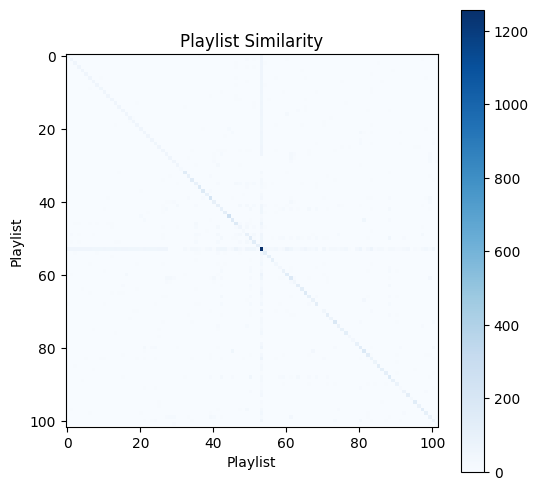

In [ ]:
# display playlist_similarity in a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(playlist_similarity, cmap='Blues', interpolation='nearest')
plt.title('Playlist Similarity')
plt.xlabel('Playlist')
plt.ylabel('Playlist')
plt.colorbar()
plt.show()

# i'm guessing that the horizontal and vertical line represents the 'dump' playlist, where I try to dump all songs from every playlist

### Spotipy

| Concept | Definition | Location | Example |
| - | - | - | - |
| Spotify URI | The resource identifier of, for example, an artist, album or track. This can be entered in the search box in a Spotify Desktop Client, to navigate to that resource. | To find a Spotify URI, right-click (on Windows) or Ctrl-Click (on a Mac) on the artist, album or track name. | spotify:track:6rqhFgbbKwnb9MLmUQDhG6 |
| Spotify ID | The base-62 identifier found at the end of the Spotify URI (see above) for an artist, track, album, playlist, etc. Unlike a Spotify URI, a Spotify ID does not clearly identify the type of resource; that information is provided elsewhere in the call. | See Spotify URI | 6rqhFgbbKwnb9MLmUQDhG6 |
| Spotify Category ID | The unique string identifying the Spotify category. | | party |
| Spotify User ID | The unique string identifying the Spotify user that you can find at the end of the Spotify URI for the user. | The ID of the current user can be obtained via the Get Current User's Profile endpoint. | wizzler |
| Spotify URL | When visited, if the user has the Spotify client installed, it will launch the Client and navigate to the requested resource. Which client is determined by the user's device and account settings at play.spotify.com. | | http://open.spotify.com/track/6rqhFgbbKwnb9MLmUQDhG6 |

Goal: look at all_playlist_data and get each tracks audio features. 

### Audio feature response

| Audio Feature | Data Type | Description | Range (If Applicable) | Example |
| - | - | - | - | - |
| acousticness | Float | Confidence measure whether track is acoustic. | 0-1, where 1.0 represents high confidence the track is acoustic. | 0.00242 |
| analysis_url | String | URL to access full analysis of the track (access token required). | NA | https://api.spotify.com/v1/audio-analysis/2takcwOaAZWiXQijPHIx7B |
| danceability | Float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. | A value of 0.0 is least danceable and 1.0 is most danceable. | 0.585 |
| duration_ms | Integer | Duration of track in milliseconds. | NA | 237040 |
| energy | Float | Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. | 0.842 |
| id | String | Spotify ID for the track. | NA | 2takcwOaAZWiXQijPHIx7B |
| instrumentalness | Float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". | The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. | 0.00686 |
| key | Integer | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. | -1 - 11 | 9 |
| liveness | Float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. |  A value above 0.8 provides strong likelihood that the track is live. | 0.0866 |
| loudness | Float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). | Values typically range between -60 and 0 db. | -5.883 |
| mode | Integer | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. | Major is represented by 1 and minor is 0. | 0 |
| speechiness | Float | Speechiness detects the presence of spoken words in a track. | The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. | 0.0556 |
| tempo | Float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. | NA | 118.211 |
| time_signature | Integer | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). | he time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". | 4 |
| track_href | String | A link to the Web API endpoint providing full details of the track. | NA | "https://api.spotify.com/v1/tracks/2takcwOaAZWiXQijPHIx7B" |
| type | String | Object type. | NA | "audio_features" |
| uri | String | The Spotify URI for the track. | NA | "spotify:track:2takcwOaAZWiXQijPHIx7B" |
| valence | Float | Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. | 0.428 |

In [60]:
# go ahead and export the following dataframes to csv: streaming_history, missing_songs, top_20_missing_songs, top_10_most_placed_songs, playlist_similarity, all_playlist_data to the folder 'Spotify Account Data/Processed Data'

streaming_history.to_csv('Spotify Account Data/Processed Data/streaming_history.csv', index=False)
missing_songs.to_csv('Spotify Account Data/Processed Data/missing_songs.csv', index=False)
top_20_missing_songs.to_csv('Spotify Account Data/Processed Data/top_20_missing_songs.csv', index=False)
top_10_most_placed_songs.to_csv('Spotify Account Data/Processed Data/top_10_most_placed_songs.csv', index=False)
playlist_similarity.to_csv('Spotify Account Data/Processed Data/playlist_similarity.csv')
all_playlist_data.to_csv('Spotify Account Data/Processed Data/all_playlist_data.csv', index=False)

